# Assignment 5 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [17]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [18]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [19]:
# word net installation:

# unmark if you want to use and need to install
#!pip install wn
#!python -m wn download omw-he:1.4

In [20]:
# word net import:

# unmark if you want to use:
import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [21]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
#!pip install hebrew_tokenizer

In [22]:
# Hebrew tokenizer import:

# unmark if you want to use:
import hebrew_tokenizer as ht

### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [23]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [24]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [25]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

In [26]:
X_test  = df_test['story']
X_train = df_train['story']
y_train = df_train['gender']


# change story to words (Tokenization)

def storys_to_words(story):
    words_list = [] #setup list
    
    tokens = ht.tokenize(story) 
    for grp, token, token_num, (start_index, end_index) in tokens:
        if grp == 'HEBREW':
            words_list.append(token)  
    return words_list


In [27]:
# pre processing the storys into tokens
def pre_process(train, test):
    words_train = [storys_to_words(story) for story in train]
    words_test  = [storys_to_words(story) for story in test]
    # returns train and test sets.
    return words_train, words_test

# preprossesing the data
X_train_processed, X_test_processed = pre_process(X_train, X_test)

In [28]:
def f1_avg_calc(tag, predicted):
    label_encoder = LabelEncoder()
    tag = label_encoder.fit_transform(tag)
    predicted = label_encoder.fit_transform(predicted)
    conf_mat = metrics.confusion_matrix(tag, predicted)
  
    
    TP = conf_mat[0][0]
    FP = conf_mat[0][1]
    FN = conf_mat[1][0]
    TN = conf_mat[1][1]

    precision_f = TP / (TP + FP)
    recall_f = TP / (TP + FN)

    precision_m = TN / (TN + FN)
    recall_m = TN / (TN + FP)

    F1_f = 2 * (precision_f * recall_f) / (precision_f + recall_f)
    F1_m = 2 * (precision_m * recall_m) / (precision_m + recall_m)

    F1_avg = (F1_f + F1_m) / 2
    return F1_avg


### Splitting the train into train and test:

In [29]:

X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_train_processed, y_train, test_size=0.2, random_state=0)

### Finding the best ML algorithm:
##### NB and DT was the best:

In [30]:
# Finding best model

names = ["Nearest Neighbors","KMeans", "Decision Tree", "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(7),KMeans(n_clusters=2, random_state=0),
    DecisionTreeClassifier(random_state=42,max_depth=15),
    MultinomialNB()]

for name, clf in zip(names, classifiers):
    name
    
    text_clf = Pipeline([
    ('vect', CountVectorizer(max_features=10000,preprocessor=lambda x: x, tokenizer=lambda x: x)),
        
        ('clf', clf)])

    
    text_clf.fit(X_train_v, y_train_v)
    predicted_train_v = text_clf.predict(X_test_v)
    
      
    print("f1-score:")

    f1_avg_calc(y_test_v, predicted_train_v)
    print('\n\n')

'Nearest Neighbors'

Pipeline(steps=[('vect',
                 CountVectorizer(max_features=10000,
                                 preprocessor=<function <lambda> at 0x000001CAF348F430>,
                                 tokenizer=<function <lambda> at 0x000001CAF348F8B0>)),
                ('clf', KNeighborsClassifier(n_neighbors=7))])

f1-score:


0.5789041994750657

'KMeans'

Pipeline(steps=[('vect',
                 CountVectorizer(max_features=10000,
                                 preprocessor=<function <lambda> at 0x000001CAEEEC78B0>,
                                 tokenizer=<function <lambda> at 0x000001CAF5B9AD30>)),
                ('clf', KMeans(n_clusters=2, random_state=0))])

f1-score:


0.3842810413586055

'Decision Tree'

Pipeline(steps=[('vect',
                 CountVectorizer(max_features=10000,
                                 preprocessor=<function <lambda> at 0x000001CAED7D2B80>,
                                 tokenizer=<function <lambda> at 0x000001CAF5B9A4C0>)),
                ('clf', DecisionTreeClassifier(max_depth=15, random_state=42))])

f1-score:


0.6225230168892142

'Naive Bayes'

Pipeline(steps=[('vect',
                 CountVectorizer(max_features=10000,
                                 preprocessor=<function <lambda> at 0x000001CAEEEC1E50>,
                                 tokenizer=<function <lambda> at 0x000001CAF5B9AD30>)),
                ('clf', MultinomialNB())])

f1-score:


0.6224086472533679

### Finding is the better one From NB and DT with cross validation:
##### NB was better:

In [37]:
# Using cross validation NB gives higher f1 scores
from sklearn.metrics import fbeta_score, make_scorer
scorer = make_scorer(f1_avg_calc, greater_is_better=True)


names = ["Decision Tree", "Naive Bayes"]

classifiers = [
    DecisionTreeClassifier(random_state=42,max_depth=15),
    MultinomialNB()]

for name, clf in zip(names, classifiers):
    name
    
    text_clf = Pipeline([
    ('vect', CountVectorizer(max_features=2500,preprocessor=lambda x: x, tokenizer=lambda x: x))
        ,('clf', clf)])

    
    text_clf.fit(X_train_v, y_train_v)
    predicted_train_v = text_clf.predict(X_test_v)
    
      
    print("f1-score:")

    f1_avg_calc(y_test_v, predicted_train_v)
    print('\n\n')

    scores = cross_val_score(text_clf, X_train_v, y_train_v, cv=10, scoring='f1_macro')
    print("f1-score average:")
    print(f"{name}: {scores.mean():.3f}")
    print('\n\n')

'Decision Tree'

Pipeline(steps=[('vect',
                 CountVectorizer(max_features=2500,
                                 preprocessor=<function <lambda> at 0x000001CAF5B9AB80>,
                                 tokenizer=<function <lambda> at 0x000001CAF348F430>)),
                ('clf', DecisionTreeClassifier(max_depth=15, random_state=42))])

f1-score:


0.6510015408320493




f1-score average:
Decision Tree: 0.537





'Naive Bayes'

Pipeline(steps=[('vect',
                 CountVectorizer(max_features=2500,
                                 preprocessor=<function <lambda> at 0x000001CAF348F550>,
                                 tokenizer=<function <lambda> at 0x000001CAEEEC1EE0>)),
                ('clf', MultinomialNB())])

f1-score:


0.6431197478991597




f1-score average:
Naive Bayes: 0.654





### Finding the best parameters for the model:
##### Using GridSearchCV:

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import fbeta_score, make_scorer
scorer = make_scorer(f1_avg_calc, greater_is_better=True)


# Define the pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer(preprocessor=lambda x: x, tokenizer=lambda x: x)),
    ('clf', MultinomialNB()),
])

# Define the parameter grid
param_grid = {
    'vect__ngram_range': [(1,1), (1,2), (1,3),(1,4)],
    'vect__max_features': [1000, 500, 10000],
    'clf__alpha': [0.1, 0.5, 1.0],
    'clf__fit_prior': [True, False],
    
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(text_clf, param_grid=param_grid, cv=10, verbose=2,scoring=scorer)
grid_search.fit(X_train_v, y_train_v)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)



Fitting 10 folds for each of 72 candidates, totalling 720 fits
[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=1000, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=1000, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=1000, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=1000, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=1000, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=1000, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=1000, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=1000, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END 

[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=500, vect__ngram_range=(1, 4); total time=   2.1s
[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=500, vect__ngram_range=(1, 4); total time=   2.2s
[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=500, vect__ngram_range=(1, 4); total time=   2.2s
[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=500, vect__ngram_range=(1, 4); total time=   2.2s
[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=500, vect__ngram_range=(1, 4); total time=   2.2s
[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=500, vect__ngram_range=(1, 4); total time=   2.2s
[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=500, vect__ngram_range=(1, 4); total time=   2.2s
[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=500, vect__ngram_range=(1, 4); total time=   2.1s
[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=500, vect__ngra

[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=1000, vect__ngram_range=(1, 3); total time=   1.4s
[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=1000, vect__ngram_range=(1, 3); total time=   1.3s
[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=1000, vect__ngram_range=(1, 3); total time=   1.3s
[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=1000, vect__ngram_range=(1, 3); total time=   1.3s
[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=1000, vect__ngram_range=(1, 3); total time=   1.3s
[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=1000, vect__ngram_range=(1, 3); total time=   1.3s
[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=1000, vect__ngram_range=(1, 3); total time=   1.3s
[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=1000, vect__ngram_range=(1, 3); total time=   1.3s
[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_feature

[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=10000, vect__ngram_range=(1, 2); total time=   0.6s
[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=10000, vect__ngram_range=(1, 2); total time=   0.6s
[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=10000, vect__ngram_range=(1, 2); total time=   0.6s
[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=10000, vect__ngram_range=(1, 2); total time=   0.6s
[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=10000, vect__ngram_range=(1, 2); total time=   0.6s
[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=10000, vect__ngram_range=(1, 2); total time=   0.6s
[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=10000, vect__ngram_range=(1, 2); total time=   0.6s
[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=10000, vect__ngram_range=(1, 3); total time=   1.3s
[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max

[CV] END clf__alpha=0.5, clf__fit_prior=True, vect__max_features=500, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=0.5, clf__fit_prior=True, vect__max_features=500, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=0.5, clf__fit_prior=True, vect__max_features=500, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=0.5, clf__fit_prior=True, vect__max_features=500, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=0.5, clf__fit_prior=True, vect__max_features=500, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=0.5, clf__fit_prior=True, vect__max_features=500, vect__ngram_range=(1, 2); total time=   0.6s
[CV] END clf__alpha=0.5, clf__fit_prior=True, vect__max_features=500, vect__ngram_range=(1, 2); total time=   0.6s
[CV] END clf__alpha=0.5, clf__fit_prior=True, vect__max_features=500, vect__ngram_range=(1, 2); total time=   0.6s
[CV] END clf__alpha=0.5, clf__fit_prior=True, vect__max_features=500, vect__ngra

[CV] END clf__alpha=0.5, clf__fit_prior=True, vect__max_features=10000, vect__ngram_range=(1, 4); total time=   2.0s
[CV] END clf__alpha=0.5, clf__fit_prior=True, vect__max_features=10000, vect__ngram_range=(1, 4); total time=   1.9s
[CV] END clf__alpha=0.5, clf__fit_prior=True, vect__max_features=10000, vect__ngram_range=(1, 4); total time=   1.9s
[CV] END clf__alpha=0.5, clf__fit_prior=True, vect__max_features=10000, vect__ngram_range=(1, 4); total time=   1.9s
[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max_features=1000, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max_features=1000, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max_features=1000, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max_features=1000, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max_feature

[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max_features=500, vect__ngram_range=(1, 3); total time=   1.2s
[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max_features=500, vect__ngram_range=(1, 3); total time=   1.2s
[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max_features=500, vect__ngram_range=(1, 3); total time=   1.2s
[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max_features=500, vect__ngram_range=(1, 4); total time=   1.9s
[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max_features=500, vect__ngram_range=(1, 4); total time=   1.9s
[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max_features=500, vect__ngram_range=(1, 4); total time=   1.9s
[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max_features=500, vect__ngram_range=(1, 4); total time=   1.9s
[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max_features=500, vect__ngram_range=(1, 4); total time=   1.9s
[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max_features=500, v

[CV] END clf__alpha=1.0, clf__fit_prior=True, vect__max_features=1000, vect__ngram_range=(1, 2); total time=   0.5s
[CV] END clf__alpha=1.0, clf__fit_prior=True, vect__max_features=1000, vect__ngram_range=(1, 2); total time=   0.5s
[CV] END clf__alpha=1.0, clf__fit_prior=True, vect__max_features=1000, vect__ngram_range=(1, 2); total time=   0.5s
[CV] END clf__alpha=1.0, clf__fit_prior=True, vect__max_features=1000, vect__ngram_range=(1, 3); total time=   1.2s
[CV] END clf__alpha=1.0, clf__fit_prior=True, vect__max_features=1000, vect__ngram_range=(1, 3); total time=   1.2s
[CV] END clf__alpha=1.0, clf__fit_prior=True, vect__max_features=1000, vect__ngram_range=(1, 3); total time=   1.2s
[CV] END clf__alpha=1.0, clf__fit_prior=True, vect__max_features=1000, vect__ngram_range=(1, 3); total time=   1.2s
[CV] END clf__alpha=1.0, clf__fit_prior=True, vect__max_features=1000, vect__ngram_range=(1, 3); total time=   1.2s
[CV] END clf__alpha=1.0, clf__fit_prior=True, vect__max_features=1000, v

[CV] END clf__alpha=1.0, clf__fit_prior=True, vect__max_features=10000, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=1.0, clf__fit_prior=True, vect__max_features=10000, vect__ngram_range=(1, 2); total time=   0.5s
[CV] END clf__alpha=1.0, clf__fit_prior=True, vect__max_features=10000, vect__ngram_range=(1, 2); total time=   0.5s
[CV] END clf__alpha=1.0, clf__fit_prior=True, vect__max_features=10000, vect__ngram_range=(1, 2); total time=   0.5s
[CV] END clf__alpha=1.0, clf__fit_prior=True, vect__max_features=10000, vect__ngram_range=(1, 2); total time=   0.5s
[CV] END clf__alpha=1.0, clf__fit_prior=True, vect__max_features=10000, vect__ngram_range=(1, 2); total time=   0.5s
[CV] END clf__alpha=1.0, clf__fit_prior=True, vect__max_features=10000, vect__ngram_range=(1, 2); total time=   0.5s
[CV] END clf__alpha=1.0, clf__fit_prior=True, vect__max_features=10000, vect__ngram_range=(1, 2); total time=   0.5s
[CV] END clf__alpha=1.0, clf__fit_prior=True, vect__max_features

[CV] END clf__alpha=1.0, clf__fit_prior=False, vect__max_features=500, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=1.0, clf__fit_prior=False, vect__max_features=500, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=1.0, clf__fit_prior=False, vect__max_features=500, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=1.0, clf__fit_prior=False, vect__max_features=500, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=1.0, clf__fit_prior=False, vect__max_features=500, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=1.0, clf__fit_prior=False, vect__max_features=500, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=1.0, clf__fit_prior=False, vect__max_features=500, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=1.0, clf__fit_prior=False, vect__max_features=500, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=1.0, clf__fit_prior=False, vect__max_features=500, v

[CV] END clf__alpha=1.0, clf__fit_prior=False, vect__max_features=10000, vect__ngram_range=(1, 4); total time=   2.2s
[CV] END clf__alpha=1.0, clf__fit_prior=False, vect__max_features=10000, vect__ngram_range=(1, 4); total time=   2.2s
[CV] END clf__alpha=1.0, clf__fit_prior=False, vect__max_features=10000, vect__ngram_range=(1, 4); total time=   2.2s
[CV] END clf__alpha=1.0, clf__fit_prior=False, vect__max_features=10000, vect__ngram_range=(1, 4); total time=   2.2s
[CV] END clf__alpha=1.0, clf__fit_prior=False, vect__max_features=10000, vect__ngram_range=(1, 4); total time=   2.2s
[CV] END clf__alpha=1.0, clf__fit_prior=False, vect__max_features=10000, vect__ngram_range=(1, 4); total time=   2.2s
[CV] END clf__alpha=1.0, clf__fit_prior=False, vect__max_features=10000, vect__ngram_range=(1, 4); total time=   2.2s
[CV] END clf__alpha=1.0, clf__fit_prior=False, vect__max_features=10000, vect__ngram_range=(1, 4); total time=   2.2s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(preprocessor=<function <lambda> at 0x0000019936132C10>,
                                                        tokenizer=<function <lambda> at 0x0000019936132EE0>)),
                                       ('clf', MultinomialNB())]),
             param_grid={'clf__alpha': [0.1, 0.5, 1.0],
                         'clf__fit_prior': [True, False],
                         'vect__max_features': [1000, 500, 10000],
                         'vect__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)]},
             scoring=make_scorer(f1_avg_calc), verbose=2)

Best parameters:  {'clf__alpha': 0.1, 'clf__fit_prior': False, 'vect__max_features': 1000, 'vect__ngram_range': (1, 1)}
Best score:  0.6576383058653971


In [17]:
# Predict on test set
y_pred = grid_search.predict(X_test_v)

# Print classification report
print(classification_report(y_test_v, y_pred))

              precision    recall  f1-score   support

           f       0.47      0.49      0.48        37
           m       0.83      0.82      0.83       114

    accuracy                           0.74       151
   macro avg       0.65      0.66      0.65       151
weighted avg       0.74      0.74      0.74       151



In [64]:
from sklearn.metrics import fbeta_score, make_scorer
scorer = make_scorer(f1_avg_calc, greater_is_better=True)


    
text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,1),
                        max_features=1000,preprocessor=lambda x: x, tokenizer=lambda x: x)),
                     ('clf', MultinomialNB(fit_prior=False,alpha=0.1))])

    
text_clf.fit(X_train_v, y_train_v)
predicted_train_v = text_clf.predict(X_test_v)
    
conf_mat_tf = confusion_matrix(y_test_v, predicted_train_v)      
print("f1-score:")

f1_avg_calc(y_test_v, predicted_train_v)

print('\n\n')

scores = cross_val_score(text_clf, X_train_v, y_train_v, cv=10, scoring=scorer)
print("f1-score average:")
print(f"{name}: {scores.mean():.3f}")
print('\n\n')
f1_tf = scores.mean()

Pipeline(steps=[('vect',
                 CountVectorizer(max_features=1000,
                                 preprocessor=<function <lambda> at 0x000001CAFEC09040>,
                                 tokenizer=<function <lambda> at 0x000001CA805B4D30>)),
                ('clf', MultinomialNB(alpha=0.1, fit_prior=False))])

f1-score:


0.6540969162995595




f1-score average:
Naive Bayes: 0.658





In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
scorer = make_scorer(f1_avg_calc, greater_is_better=True)
# Define the pipeline
text_clf = Pipeline([
    ('vect', TfidfVectorizer(preprocessor=lambda x: x, tokenizer=lambda x: x)),
    ('clf', MultinomialNB()),
])

# Define the parameter grid
param_grid = {
    'vect__ngram_range': [(1,1), (1,2), (1,3),(1,4)],
    'vect__max_features': [500, 1000,4000,8000, 10000],
    'clf__alpha': [0.1, 0.5, 1.0],
    'clf__fit_prior': [True, False],   
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(text_clf, param_grid=param_grid, cv=10, verbose=2,scoring=scorer)
grid_search.fit(X_train_v, y_train_v)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Fitting 10 folds for each of 120 candidates, totalling 1200 fits
[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=500, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=500, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=500, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=500, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=500, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=500, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=500, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=500, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__a

[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=1000, vect__ngram_range=(1, 4); total time=   2.0s
[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=1000, vect__ngram_range=(1, 4); total time=   2.0s
[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=1000, vect__ngram_range=(1, 4); total time=   2.0s
[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=1000, vect__ngram_range=(1, 4); total time=   2.0s
[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=1000, vect__ngram_range=(1, 4); total time=   2.0s
[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=1000, vect__ngram_range=(1, 4); total time=   2.0s
[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=1000, vect__ngram_range=(1, 4); total time=   2.0s
[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=1000, vect__ngram_range=(1, 4); total time=   2.0s
[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=1000, v

[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=8000, vect__ngram_range=(1, 3); total time=   1.2s
[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=8000, vect__ngram_range=(1, 3); total time=   1.2s
[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=8000, vect__ngram_range=(1, 3); total time=   1.3s
[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=8000, vect__ngram_range=(1, 3); total time=   1.2s
[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=8000, vect__ngram_range=(1, 3); total time=   1.2s
[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=8000, vect__ngram_range=(1, 3); total time=   1.2s
[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=8000, vect__ngram_range=(1, 3); total time=   1.2s
[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=8000, vect__ngram_range=(1, 3); total time=   1.2s
[CV] END clf__alpha=0.1, clf__fit_prior=True, vect__max_features=8000, v

[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=500, vect__ngram_range=(1, 2); total time=   0.6s
[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=500, vect__ngram_range=(1, 2); total time=   0.6s
[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=500, vect__ngram_range=(1, 2); total time=   0.6s
[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=500, vect__ngram_range=(1, 2); total time=   0.5s
[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=500, vect__ngram_range=(1, 2); total time=   0.5s
[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=500, vect__ngram_range=(1, 2); total time=   0.5s
[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=500, vect__ngram_range=(1, 2); total time=   0.5s
[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=500, vect__ngram_range=(1, 3); total time=   1.2s
[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=500, v

[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=4000, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=4000, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=4000, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=4000, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=4000, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=4000, vect__ngram_range=(1, 2); total time=   0.5s
[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=4000, vect__ngram_range=(1, 2); total time=   0.5s
[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=4000, vect__ngram_range=(1, 2); total time=   0.6s
[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_feature

[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=8000, vect__ngram_range=(1, 4); total time=   2.3s
[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=8000, vect__ngram_range=(1, 4); total time=   2.5s
[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=8000, vect__ngram_range=(1, 4); total time=   2.4s
[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=8000, vect__ngram_range=(1, 4); total time=   2.4s
[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=10000, vect__ngram_range=(1, 1); total time=   0.1s
[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=10000, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=10000, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_features=10000, vect__ngram_range=(1, 1); total time=   0.1s
[CV] END clf__alpha=0.1, clf__fit_prior=False, vect__max_fea

[CV] END clf__alpha=0.5, clf__fit_prior=True, vect__max_features=500, vect__ngram_range=(1, 3); total time=   1.3s
[CV] END clf__alpha=0.5, clf__fit_prior=True, vect__max_features=500, vect__ngram_range=(1, 3); total time=   1.2s
[CV] END clf__alpha=0.5, clf__fit_prior=True, vect__max_features=500, vect__ngram_range=(1, 3); total time=   1.3s
[CV] END clf__alpha=0.5, clf__fit_prior=True, vect__max_features=500, vect__ngram_range=(1, 4); total time=   2.1s
[CV] END clf__alpha=0.5, clf__fit_prior=True, vect__max_features=500, vect__ngram_range=(1, 4); total time=   2.1s
[CV] END clf__alpha=0.5, clf__fit_prior=True, vect__max_features=500, vect__ngram_range=(1, 4); total time=   2.0s
[CV] END clf__alpha=0.5, clf__fit_prior=True, vect__max_features=500, vect__ngram_range=(1, 4); total time=   2.1s
[CV] END clf__alpha=0.5, clf__fit_prior=True, vect__max_features=500, vect__ngram_range=(1, 4); total time=   2.1s
[CV] END clf__alpha=0.5, clf__fit_prior=True, vect__max_features=500, vect__ngra

[CV] END clf__alpha=0.5, clf__fit_prior=True, vect__max_features=4000, vect__ngram_range=(1, 2); total time=   0.5s
[CV] END clf__alpha=0.5, clf__fit_prior=True, vect__max_features=4000, vect__ngram_range=(1, 2); total time=   0.6s
[CV] END clf__alpha=0.5, clf__fit_prior=True, vect__max_features=4000, vect__ngram_range=(1, 3); total time=   1.3s
[CV] END clf__alpha=0.5, clf__fit_prior=True, vect__max_features=4000, vect__ngram_range=(1, 3); total time=   1.3s
[CV] END clf__alpha=0.5, clf__fit_prior=True, vect__max_features=4000, vect__ngram_range=(1, 3); total time=   1.3s
[CV] END clf__alpha=0.5, clf__fit_prior=True, vect__max_features=4000, vect__ngram_range=(1, 3); total time=   1.3s
[CV] END clf__alpha=0.5, clf__fit_prior=True, vect__max_features=4000, vect__ngram_range=(1, 3); total time=   1.3s
[CV] END clf__alpha=0.5, clf__fit_prior=True, vect__max_features=4000, vect__ngram_range=(1, 3); total time=   1.2s
[CV] END clf__alpha=0.5, clf__fit_prior=True, vect__max_features=4000, v

[CV] END clf__alpha=0.5, clf__fit_prior=True, vect__max_features=10000, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=0.5, clf__fit_prior=True, vect__max_features=10000, vect__ngram_range=(1, 2); total time=   0.6s
[CV] END clf__alpha=0.5, clf__fit_prior=True, vect__max_features=10000, vect__ngram_range=(1, 2); total time=   0.6s
[CV] END clf__alpha=0.5, clf__fit_prior=True, vect__max_features=10000, vect__ngram_range=(1, 2); total time=   0.6s
[CV] END clf__alpha=0.5, clf__fit_prior=True, vect__max_features=10000, vect__ngram_range=(1, 2); total time=   0.6s
[CV] END clf__alpha=0.5, clf__fit_prior=True, vect__max_features=10000, vect__ngram_range=(1, 2); total time=   0.6s
[CV] END clf__alpha=0.5, clf__fit_prior=True, vect__max_features=10000, vect__ngram_range=(1, 2); total time=   0.6s
[CV] END clf__alpha=0.5, clf__fit_prior=True, vect__max_features=10000, vect__ngram_range=(1, 2); total time=   0.6s
[CV] END clf__alpha=0.5, clf__fit_prior=True, vect__max_features

[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max_features=1000, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max_features=1000, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max_features=1000, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max_features=1000, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max_features=1000, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max_features=1000, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max_features=1000, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max_features=1000, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max_feature

[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max_features=4000, vect__ngram_range=(1, 4); total time=   2.1s
[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max_features=4000, vect__ngram_range=(1, 4); total time=   2.0s
[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max_features=4000, vect__ngram_range=(1, 4); total time=   2.1s
[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max_features=4000, vect__ngram_range=(1, 4); total time=   2.1s
[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max_features=4000, vect__ngram_range=(1, 4); total time=   2.1s
[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max_features=4000, vect__ngram_range=(1, 4); total time=   2.1s
[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max_features=4000, vect__ngram_range=(1, 4); total time=   2.0s
[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max_features=4000, vect__ngram_range=(1, 4); total time=   2.1s
[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max_feature

[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max_features=10000, vect__ngram_range=(1, 3); total time=   1.3s
[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max_features=10000, vect__ngram_range=(1, 3); total time=   1.3s
[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max_features=10000, vect__ngram_range=(1, 3); total time=   1.4s
[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max_features=10000, vect__ngram_range=(1, 3); total time=   1.3s
[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max_features=10000, vect__ngram_range=(1, 3); total time=   1.3s
[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max_features=10000, vect__ngram_range=(1, 3); total time=   1.3s
[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max_features=10000, vect__ngram_range=(1, 3); total time=   1.4s
[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max_features=10000, vect__ngram_range=(1, 3); total time=   1.3s
[CV] END clf__alpha=0.5, clf__fit_prior=False, vect__max

[CV] END clf__alpha=1.0, clf__fit_prior=True, vect__max_features=1000, vect__ngram_range=(1, 2); total time=   0.6s
[CV] END clf__alpha=1.0, clf__fit_prior=True, vect__max_features=1000, vect__ngram_range=(1, 2); total time=   0.6s
[CV] END clf__alpha=1.0, clf__fit_prior=True, vect__max_features=1000, vect__ngram_range=(1, 2); total time=   0.6s
[CV] END clf__alpha=1.0, clf__fit_prior=True, vect__max_features=1000, vect__ngram_range=(1, 2); total time=   0.6s
[CV] END clf__alpha=1.0, clf__fit_prior=True, vect__max_features=1000, vect__ngram_range=(1, 2); total time=   0.6s
[CV] END clf__alpha=1.0, clf__fit_prior=True, vect__max_features=1000, vect__ngram_range=(1, 2); total time=   0.6s
[CV] END clf__alpha=1.0, clf__fit_prior=True, vect__max_features=1000, vect__ngram_range=(1, 2); total time=   0.6s
[CV] END clf__alpha=1.0, clf__fit_prior=True, vect__max_features=1000, vect__ngram_range=(1, 3); total time=   1.3s
[CV] END clf__alpha=1.0, clf__fit_prior=True, vect__max_features=1000, v

[CV] END clf__alpha=1.0, clf__fit_prior=True, vect__max_features=8000, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=1.0, clf__fit_prior=True, vect__max_features=8000, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=1.0, clf__fit_prior=True, vect__max_features=8000, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=1.0, clf__fit_prior=True, vect__max_features=8000, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=1.0, clf__fit_prior=True, vect__max_features=8000, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=1.0, clf__fit_prior=True, vect__max_features=8000, vect__ngram_range=(1, 2); total time=   0.6s
[CV] END clf__alpha=1.0, clf__fit_prior=True, vect__max_features=8000, vect__ngram_range=(1, 2); total time=   0.6s
[CV] END clf__alpha=1.0, clf__fit_prior=True, vect__max_features=8000, vect__ngram_range=(1, 2); total time=   0.6s
[CV] END clf__alpha=1.0, clf__fit_prior=True, vect__max_features=8000, v

[CV] END clf__alpha=1.0, clf__fit_prior=True, vect__max_features=10000, vect__ngram_range=(1, 4); total time=   2.1s
[CV] END clf__alpha=1.0, clf__fit_prior=True, vect__max_features=10000, vect__ngram_range=(1, 4); total time=   2.0s
[CV] END clf__alpha=1.0, clf__fit_prior=True, vect__max_features=10000, vect__ngram_range=(1, 4); total time=   2.1s
[CV] END clf__alpha=1.0, clf__fit_prior=True, vect__max_features=10000, vect__ngram_range=(1, 4); total time=   2.1s
[CV] END clf__alpha=1.0, clf__fit_prior=False, vect__max_features=500, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=1.0, clf__fit_prior=False, vect__max_features=500, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=1.0, clf__fit_prior=False, vect__max_features=500, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=1.0, clf__fit_prior=False, vect__max_features=500, vect__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__alpha=1.0, clf__fit_prior=False, vect__max_features=50

[CV] END clf__alpha=1.0, clf__fit_prior=False, vect__max_features=1000, vect__ngram_range=(1, 3); total time=   1.3s
[CV] END clf__alpha=1.0, clf__fit_prior=False, vect__max_features=1000, vect__ngram_range=(1, 3); total time=   1.3s
[CV] END clf__alpha=1.0, clf__fit_prior=False, vect__max_features=1000, vect__ngram_range=(1, 3); total time=   1.2s
[CV] END clf__alpha=1.0, clf__fit_prior=False, vect__max_features=1000, vect__ngram_range=(1, 4); total time=   2.0s
[CV] END clf__alpha=1.0, clf__fit_prior=False, vect__max_features=1000, vect__ngram_range=(1, 4); total time=   2.0s
[CV] END clf__alpha=1.0, clf__fit_prior=False, vect__max_features=1000, vect__ngram_range=(1, 4); total time=   2.0s
[CV] END clf__alpha=1.0, clf__fit_prior=False, vect__max_features=1000, vect__ngram_range=(1, 4); total time=   2.1s
[CV] END clf__alpha=1.0, clf__fit_prior=False, vect__max_features=1000, vect__ngram_range=(1, 4); total time=   2.1s
[CV] END clf__alpha=1.0, clf__fit_prior=False, vect__max_feature

[CV] END clf__alpha=1.0, clf__fit_prior=False, vect__max_features=8000, vect__ngram_range=(1, 2); total time=   0.6s
[CV] END clf__alpha=1.0, clf__fit_prior=False, vect__max_features=8000, vect__ngram_range=(1, 2); total time=   0.6s
[CV] END clf__alpha=1.0, clf__fit_prior=False, vect__max_features=8000, vect__ngram_range=(1, 3); total time=   1.3s
[CV] END clf__alpha=1.0, clf__fit_prior=False, vect__max_features=8000, vect__ngram_range=(1, 3); total time=   1.3s
[CV] END clf__alpha=1.0, clf__fit_prior=False, vect__max_features=8000, vect__ngram_range=(1, 3); total time=   1.3s
[CV] END clf__alpha=1.0, clf__fit_prior=False, vect__max_features=8000, vect__ngram_range=(1, 3); total time=   1.3s
[CV] END clf__alpha=1.0, clf__fit_prior=False, vect__max_features=8000, vect__ngram_range=(1, 3); total time=   1.3s
[CV] END clf__alpha=1.0, clf__fit_prior=False, vect__max_features=8000, vect__ngram_range=(1, 3); total time=   1.3s
[CV] END clf__alpha=1.0, clf__fit_prior=False, vect__max_feature

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(preprocessor=<function <lambda> at 0x000001F85B3230D0>,
                                                        tokenizer=<function <lambda> at 0x000001F85E147430>)),
                                       ('clf', MultinomialNB())]),
             param_grid={'clf__alpha': [0.1, 0.5, 1.0],
                         'clf__fit_prior': [True, False],
                         'vect__max_features': [500, 1000, 4000, 8000, 10000],
                         'vect__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)]},
             scoring=make_scorer(f1_avg_calc), verbose=2)

Best parameters:  {'clf__alpha': 0.1, 'clf__fit_prior': False, 'vect__max_features': 4000, 'vect__ngram_range': (1, 4)}
Best score:  0.67917818700087


## Best params was:
#### ngram_range=(1,4),max_features=4000,fit_prior=False,alpha=0.1
#### using Tfidf gave better results than using tf

In [66]:
from sklearn.metrics import fbeta_score, make_scorer
scorer = make_scorer(f1_avg_calc, greater_is_better=True)


    
text_clf = Pipeline([('vect', TfidfVectorizer(ngram_range=(1,4),
                        max_features=4000,preprocessor=lambda x: x, tokenizer=lambda x: x)),
                     ('clf', MultinomialNB(fit_prior=False,alpha=0.1))])

    
text_clf.fit(X_train_v, y_train_v)
predicted_train_v = text_clf.predict(X_test_v)
    
conf_mat_tfidf = confusion_matrix(y_test_v, predicted_train_v)      
print("f1-score:")

f1_avg_calc(y_test_v, predicted_train_v)

print('\n\n')

scores = cross_val_score(text_clf, X_train_v, y_train_v, cv=10, scoring=scorer)
print("f1-score average:")
print(f"{name}: {scores.mean():.3f}")
print('\n\n')
f1_tfidf = scores.mean()

Pipeline(steps=[('vect',
                 TfidfVectorizer(max_features=4000, ngram_range=(1, 4),
                                 preprocessor=<function <lambda> at 0x000001CA8969CC10>,
                                 tokenizer=<function <lambda> at 0x000001CA8969CD30>)),
                ('clf', MultinomialNB(alpha=0.1, fit_prior=False))])

f1-score:


0.6431197478991597




f1-score average:
Naive Bayes: 0.679





In [69]:
   
cms = [{
            'Confusion Matrix': conf_mat_tf,
            'average_f1':f1_tf,
      },{
            'Confusion Matrix': conf_mat_tfidf,
            'average_f1':f1_tfidf,
      }]

In [70]:
cms

[{'Confusion Matrix': array([[18, 19],
         [20, 94]], dtype=int64),
  'average_f1': 0.6576383058653971},
 {'Confusion Matrix': array([[ 14,  23],
         [ 13, 101]], dtype=int64),
  'average_f1': 0.67917818700087}]

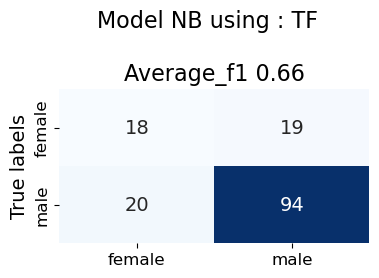

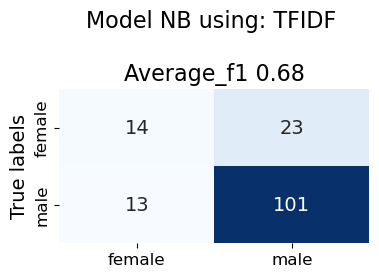

In [77]:
def plot_confusion_matrix(score):
    for i in range(len(score)):
        fig, ax = plt.subplots(figsize=(4, 2))

        sns.heatmap(score[i]['Confusion Matrix'], annot=True, fmt='g', cmap='Blues', cbar=False,
                            annot_kws={'fontsize': 14}, ax=ax)
        #     ax.set_xlabel('Predicted labels', fontsize=14)
        ax.set_ylabel('True labels', fontsize=14)
        ax.set_xticklabels(['female', 'male'], fontsize=12)
        ax.set_yticklabels(['female', 'male'], fontsize=12)
        if(i==0):
            ax.set_title(f"Model NB using : TF  \n\nAverage_f1 {score[i]['average_f1']:.2f}", fontsize=16)
        else:
            
            ax.set_title(f"Model NB using: TFIDF \n\nAverage_f1 {score[i]['average_f1']:.2f}", fontsize=16)
        plt.show()
plot_confusion_matrix(cms)

### Model training:

In [53]:
text_clf_test = Pipeline([('vect', TfidfVectorizer(ngram_range=(1,4),
                        max_features=4000,preprocessor=lambda x: x, tokenizer=lambda x: x)),
                     ('clf', MultinomialNB(fit_prior=False,alpha=0.1))])


text_clf_test.fit(df_train.story, df_train.gender)
predicted_test = text_clf_test.predict(df_test.story)



Pipeline(steps=[('vect',
                 TfidfVectorizer(max_features=4000, ngram_range=(1, 4),
                                 preprocessor=<function <lambda> at 0x000001F86AF77DC0>,
                                 tokenizer=<function <lambda> at 0x000001F853E43B80>)),
                ('clf', MultinomialNB(alpha=0.1, fit_prior=False))])

In [54]:
df_predicted = df_test.copy()

df_predicted.drop(labels='story', axis=1, inplace=True)
df_predicted['predicted_value'] = predicted_test

df_predicted.tail(10)

,test_example_id,predicted_category
313,313,m
314,314,f
315,315,m
316,316,m
317,317,m
318,318,m
319,319,m
320,320,m
321,321,f
322,322,m


### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [55]:
df_predicted.to_csv('classification_results.csv',index=False)